In [1]:
import pandas as pd

# Load train data
data = pd.read_csv('../data/ml/hotel_reservations_train.csv')
X_train = data.drop('booking_status', axis=1)
y_train = data['booking_status']


In [2]:
# Load test data
data = pd.read_csv('../data/ml/hotel_reservations_test.csv')
X_test = data.drop('booking_status', axis=1)
y_test = data['booking_status']

In [3]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import seaborn as sns
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

# Treniranje

## MLPCLassifier

In [4]:
from sklearn.neural_network import MLPClassifier

# Make model
model_mlp = MLPClassifier(hidden_layer_sizes=(100, 100, 100), activation='relu', solver='adam', 
                      alpha=0.0001, batch_size='auto', learning_rate='constant', 
                      learning_rate_init=0.001, power_t=0.5, max_iter=1000, shuffle=True, 
                      random_state=42, tol=0.0001, verbose=False, warm_start=False, 
                      momentum=0.9, nesterovs_momentum=True, early_stopping=False, 
                      validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08, 
                      n_iter_no_change=10, max_fun=15000)

In [5]:
# Train model
model_mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(100, 100, 100), max_iter=1000,
              random_state=42)

In [6]:
# Use predict method on test data
y_pred_mlp = model_mlp.predict(X_test)

Accuracy: 0.79
Precision: 0.81
Recall: 0.79
F1 Score: 0.77
Balanced Accuracy: 0.70
ROC AUC: 0.70


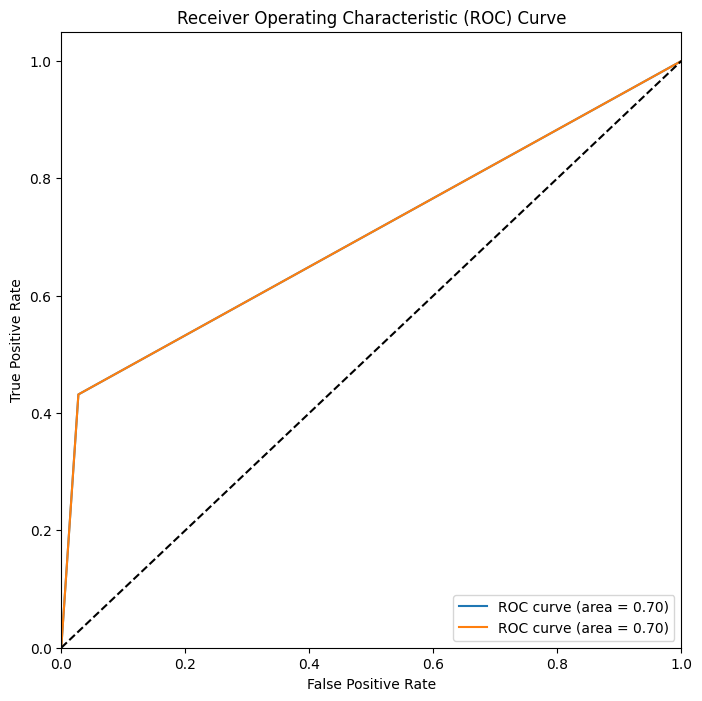

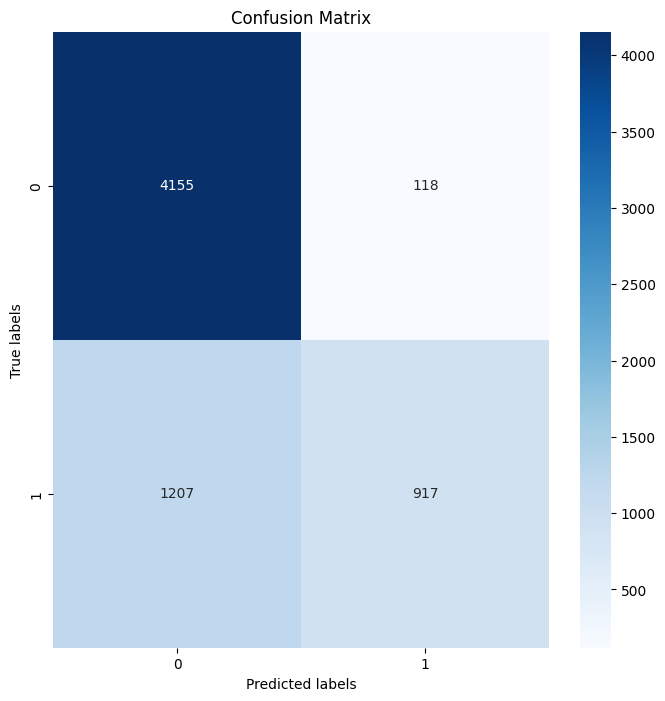

              precision    recall  f1-score   support

           0       0.77      0.97      0.86      4273
           1       0.89      0.43      0.58      2124

    accuracy                           0.79      6397
   macro avg       0.83      0.70      0.72      6397
weighted avg       0.81      0.79      0.77      6397



In [7]:
# Compute the accuracy score
accuracy = accuracy_score(y_test, y_pred_mlp)
print(f'Accuracy: {accuracy:.2f}')

# Compute the precision score
precision = precision_score(y_test, y_pred_mlp, average='weighted')
print(f'Precision: {precision:.2f}')

# Compute the recall score
recall = recall_score(y_test, y_pred_mlp, average='weighted')
print(f'Recall: {recall:.2f}')

# Compute the F1 score
f1 = f1_score(y_test, y_pred_mlp, average='weighted')
print(f'F1 Score: {f1:.2f}')

# Compute the balanced accuracy score
balanced_accuracy = balanced_accuracy_score(y_test, y_pred_mlp)
print(f'Balanced Accuracy: {balanced_accuracy:.2f}')

# Compute the ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred_mlp, average='weighted', multi_class='ovr')
print(f'ROC AUC: {roc_auc:.2f}')

# Compute the ROC curve
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = 2
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_pred_mlp)
    roc_auc[i] = roc_auc_score(y_test, y_pred_mlp)
    
# Plot the ROC curve
fig, ax = plt.subplots(figsize=(8, 8))
for i in range(n_classes):
    ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])

ax.plot([0, 1], [0, 1], 'k--')
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver Operating Characteristic (ROC) Curve')
ax.legend(loc='lower right')
plt.savefig('../reports/images/roc_curve_mlp.png')
plt.show()

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_mlp)

# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
plt.savefig('../reports/images/confusion_matrix_mlp.png')
plt.show()

# Compute the classification report
cr = classification_report(y_test, y_pred_mlp)
print(cr)

## XGBoost

In [8]:
from xgboost import XGBClassifier

model_xgb = XGBClassifier(
    max_depth=3,
    learning_rate=0.1,
    n_estimators=100,
    verbosity=1,
    objective='binary:logistic',
    booster='gbtree',
    tree_method='auto',
    n_jobs=1,
    gpu_id=-1,
    gamma=0,
    min_child_weight=1,
    max_delta_step=0,
    subsample=1,
    colsample_bytree=1,
    colsample_bylevel=1,
    colsample_bynode=1,
    reg_alpha=0,
    reg_lambda=1,
    scale_pos_weight=1,
    base_score=0.5,
    random_state=42,
    missing=0, 
    num_parallel_tree=1,
    importance_type='gain',
)

# Train model
model_xgb.fit(X_train, y_train)

# Use predict method on test data
y_pred_xgb = model_xgb.predict(X_test)

C:\Users\marij\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:160: UserWarning: [22:37:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:45: `gpu_id` is deprecated since2.0.0, use `device` instead. E.g. device=cpu/cuda/cuda:0
  warnings.warn(smsg, UserWarning)


Accuracy: 0.85
Precision: 0.85
Recall: 0.85
F1 Score: 0.84
Balanced Accuracy: 0.81
ROC AUC: 0.81


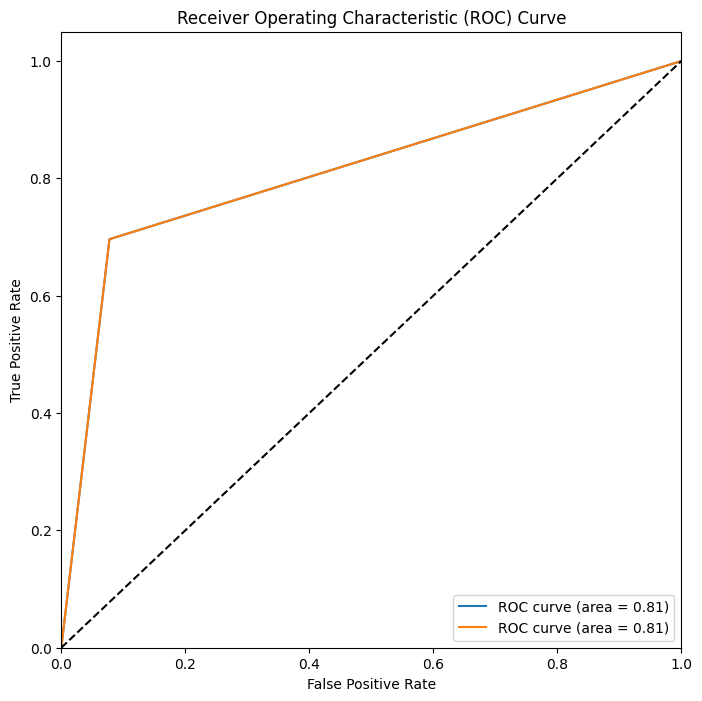

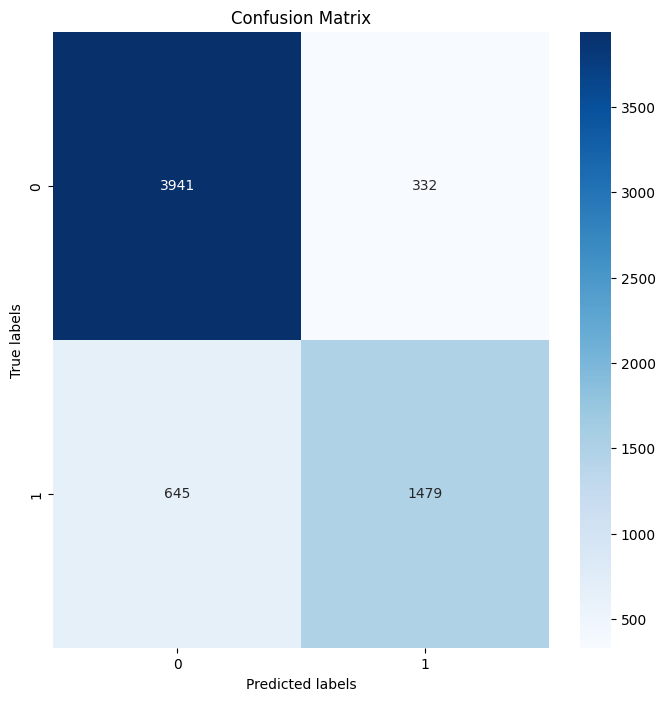

              precision    recall  f1-score   support

           0       0.86      0.92      0.89      4273
           1       0.82      0.70      0.75      2124

    accuracy                           0.85      6397
   macro avg       0.84      0.81      0.82      6397
weighted avg       0.85      0.85      0.84      6397



In [9]:
# Compute the accuracy score
accuracy = accuracy_score(y_test, y_pred_xgb)
print(f'Accuracy: {accuracy:.2f}')

# Compute the precision score
precision = precision_score(y_test, y_pred_xgb, average='weighted')
print(f'Precision: {precision:.2f}')

# Compute the recall score
recall = recall_score(y_test, y_pred_xgb, average='weighted')
print(f'Recall: {recall:.2f}')

# Compute the F1 score
f1 = f1_score(y_test, y_pred_xgb, average='weighted')
print(f'F1 Score: {f1:.2f}')

# Compute the balanced accuracy score
balanced_accuracy = balanced_accuracy_score(y_test, y_pred_xgb)
print(f'Balanced Accuracy: {balanced_accuracy:.2f}')

# Compute the ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred_xgb, average='weighted', multi_class='ovr')
print(f'ROC AUC: {roc_auc:.2f}')

# Compute the ROC curve
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = 2
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_pred_xgb)
    roc_auc[i] = roc_auc_score(y_test, y_pred_xgb)
    
# Plot the ROC curve
fig, ax = plt.subplots(figsize=(8, 8))
for i in range(n_classes):
    ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])

ax.plot([0, 1], [0, 1], 'k--')
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver Operating Characteristic (ROC) Curve')
ax.legend(loc='lower right')
plt.savefig('../reports/images/roc_curve_xgb.png')
plt.show()

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_xgb)

# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
plt.savefig('../reports/images/confusion_matrix_xgb.png')
plt.show()

# Compute the classification report
cr = classification_report(y_test, y_pred_xgb)
print(cr)

## Logistic Regression

In [10]:
# Make Logistic Regression model
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=1.0, fit_intercept=True,
                            intercept_scaling=1, class_weight=None, random_state=42, solver='lbfgs',
                            max_iter=1000, multi_class='auto', verbose=0, warm_start=False, n_jobs=None,
                            l1_ratio=None)

# Train model
model_lr.fit(X_train, y_train)

# Use predict method on test data
y_pred_lr = model_lr.predict(X_test)

Accuracy: 0.80
Precision: 0.80
Recall: 0.80
F1 Score: 0.80
Balanced Accuracy: 0.76
ROC AUC: 0.76


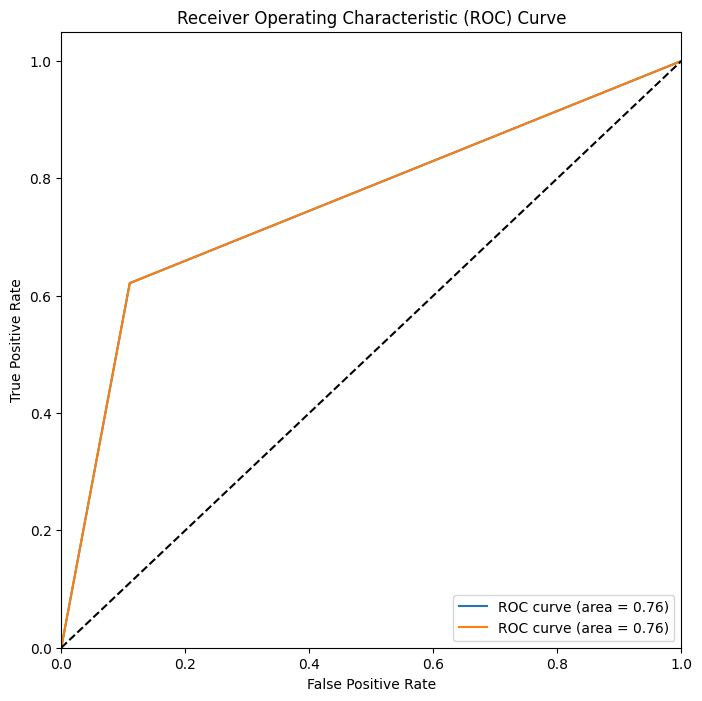

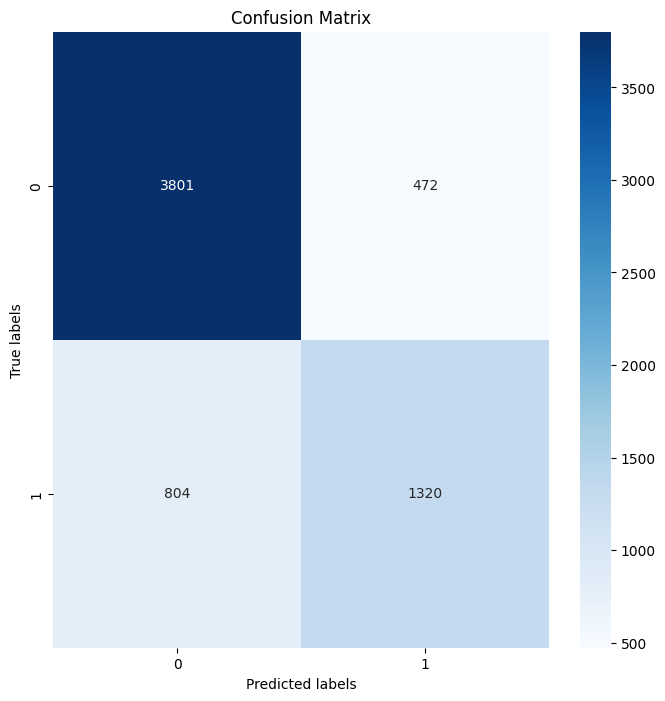

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      4273
           1       0.74      0.62      0.67      2124

    accuracy                           0.80      6397
   macro avg       0.78      0.76      0.77      6397
weighted avg       0.80      0.80      0.80      6397



In [11]:
# Compute the accuracy score
accuracy = accuracy_score(y_test, y_pred_lr)
print(f'Accuracy: {accuracy:.2f}')

# Compute the precision score
precision = precision_score(y_test, y_pred_lr, average='weighted')
print(f'Precision: {precision:.2f}')

# Compute the recall score
recall = recall_score(y_test, y_pred_lr, average='weighted')
print(f'Recall: {recall:.2f}')

# Compute the F1 score
f1 = f1_score(y_test, y_pred_lr, average='weighted')
print(f'F1 Score: {f1:.2f}')

# Compute the balanced accuracy score
balanced_accuracy = balanced_accuracy_score(y_test, y_pred_lr)
print(f'Balanced Accuracy: {balanced_accuracy:.2f}')

# Compute the ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred_lr, average='weighted', multi_class='ovr')
print(f'ROC AUC: {roc_auc:.2f}')

# Compute the ROC curve
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = 2
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_pred_lr)
    roc_auc[i] = roc_auc_score(y_test, y_pred_lr)
    
# Plot the ROC curve
fig, ax = plt.subplots(figsize=(8, 8))
for i in range(n_classes):
    ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])

ax.plot([0, 1], [0, 1], 'k--')
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver Operating Characteristic (ROC) Curve')
ax.legend(loc='lower right')
plt.savefig('../reports/images/roc_curve_lr.png')
plt.show()

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_lr)

# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
plt.savefig('../reports/images/confusion_matrix_lr.png')
plt.show()

# Compute the classification report
cr = classification_report(y_test, y_pred_lr)
print(cr)

# Treniranje na skaliranim podacima

In [12]:
# Scale data before training
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import RobustScaler

scalers = {
    'standard': StandardScaler(),
    'min_max': MinMaxScaler(),
    'max_abs': MaxAbsScaler(),
    'robust': RobustScaler()
}

## MLP

Accuracy: 0.85
Precision: 0.85
Recall: 0.85
F1 Score: 0.85
Balanced Accuracy: 0.83
ROC AUC: 0.83


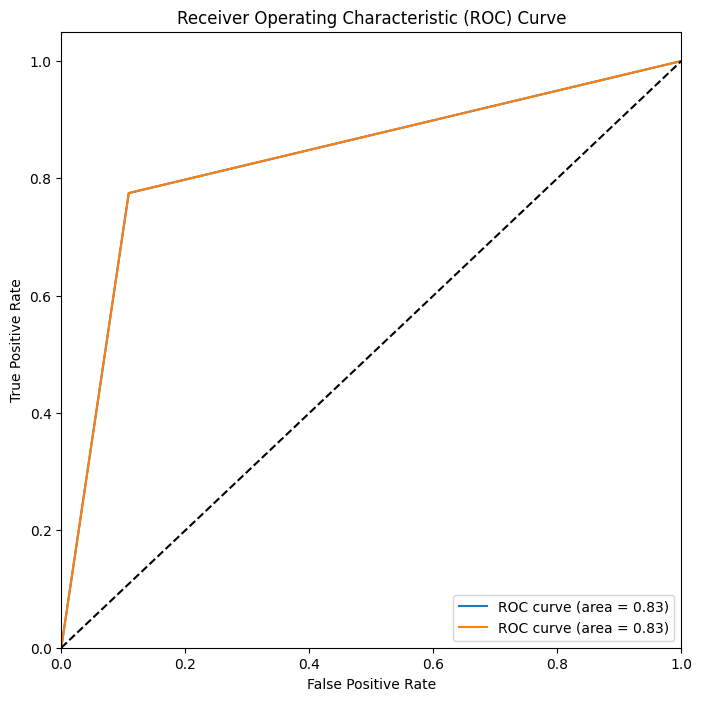

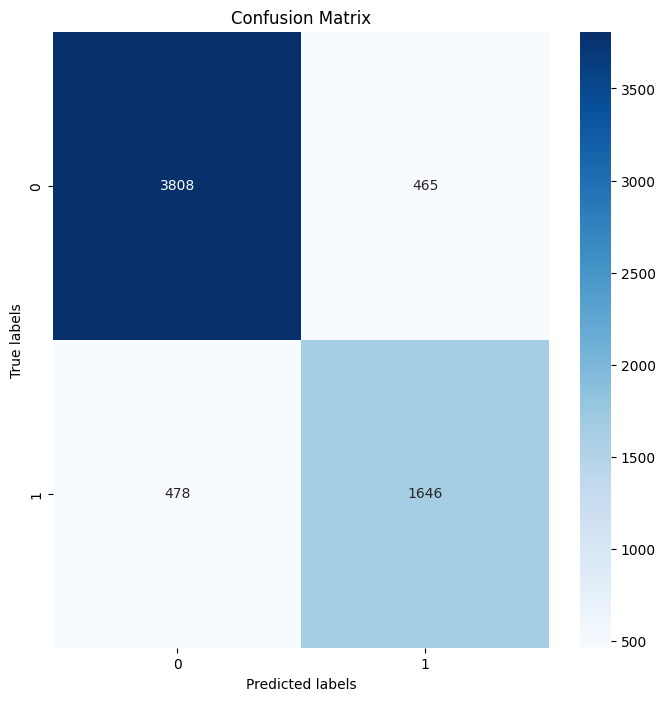

              precision    recall  f1-score   support

           0       0.89      0.89      0.89      4273
           1       0.78      0.77      0.78      2124

    accuracy                           0.85      6397
   macro avg       0.83      0.83      0.83      6397
weighted avg       0.85      0.85      0.85      6397

Accuracy: 0.86
Precision: 0.86
Recall: 0.86
F1 Score: 0.86
Balanced Accuracy: 0.84
ROC AUC: 0.84


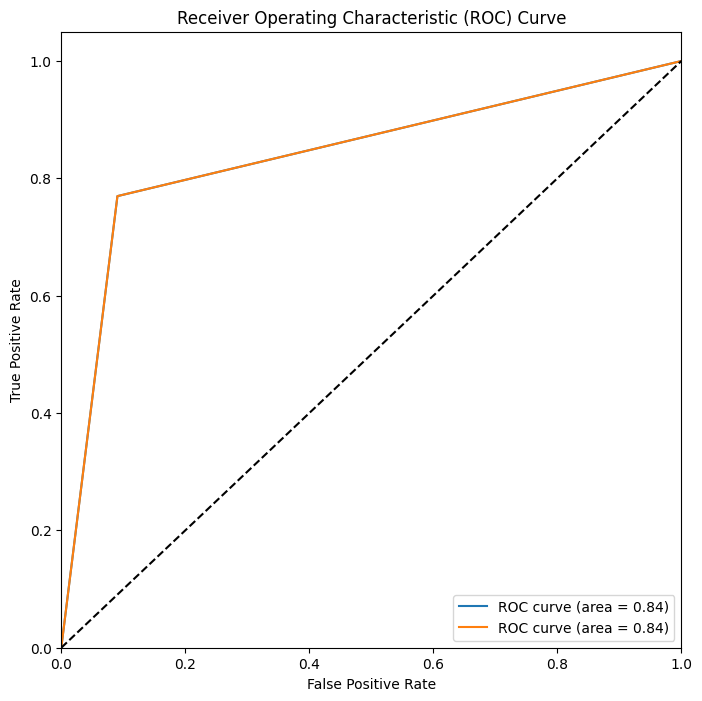

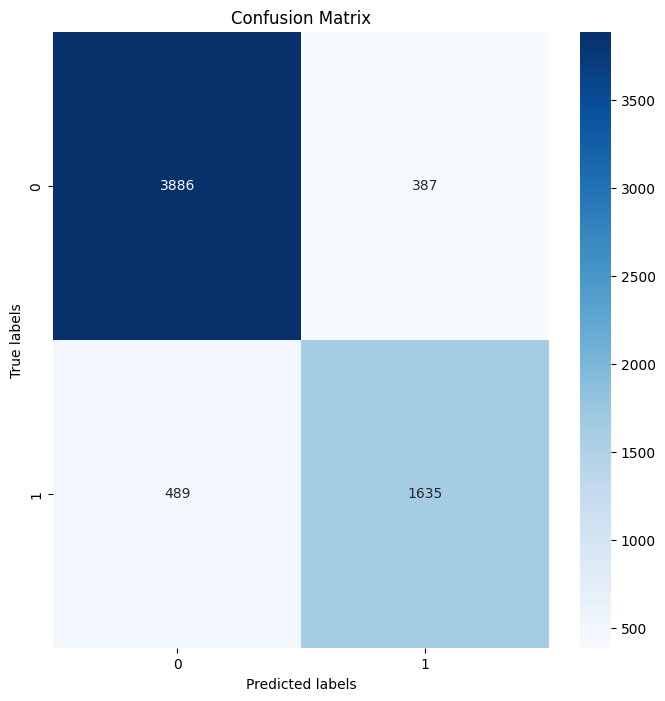

              precision    recall  f1-score   support

           0       0.89      0.91      0.90      4273
           1       0.81      0.77      0.79      2124

    accuracy                           0.86      6397
   macro avg       0.85      0.84      0.84      6397
weighted avg       0.86      0.86      0.86      6397

Accuracy: 0.85
Precision: 0.85
Recall: 0.85
F1 Score: 0.85
Balanced Accuracy: 0.83
ROC AUC: 0.83


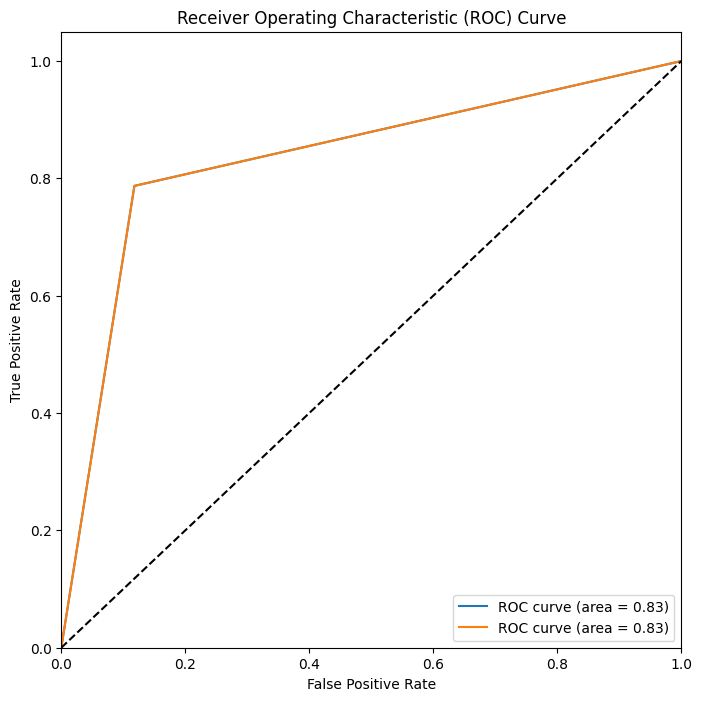

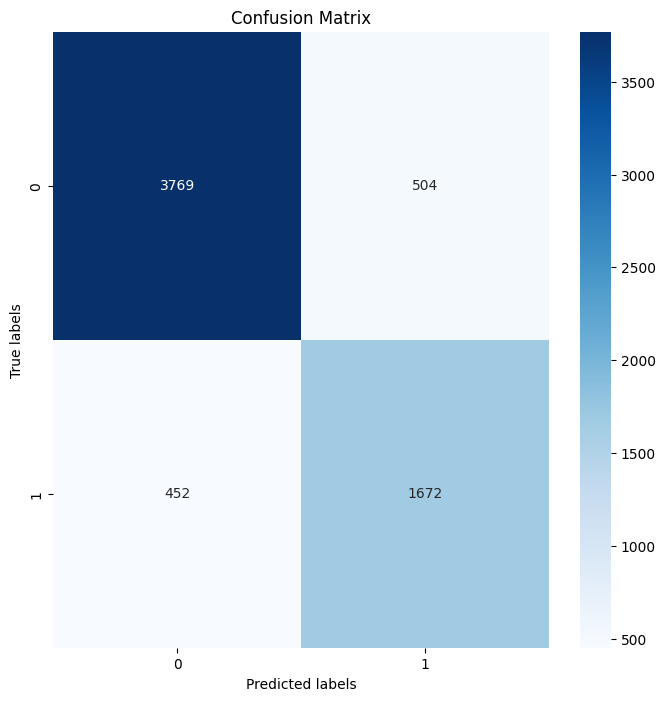

              precision    recall  f1-score   support

           0       0.89      0.88      0.89      4273
           1       0.77      0.79      0.78      2124

    accuracy                           0.85      6397
   macro avg       0.83      0.83      0.83      6397
weighted avg       0.85      0.85      0.85      6397

Accuracy: 0.86
Precision: 0.86
Recall: 0.86
F1 Score: 0.86
Balanced Accuracy: 0.84
ROC AUC: 0.84


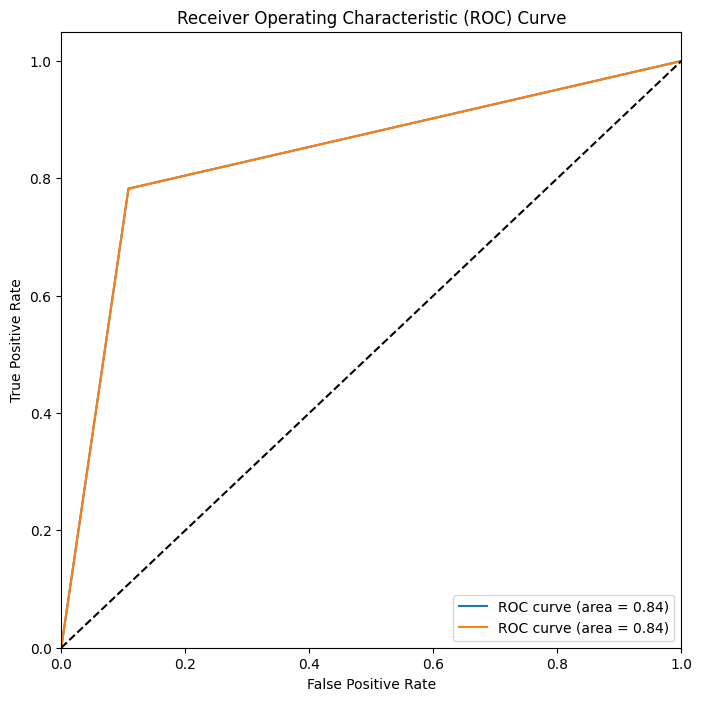

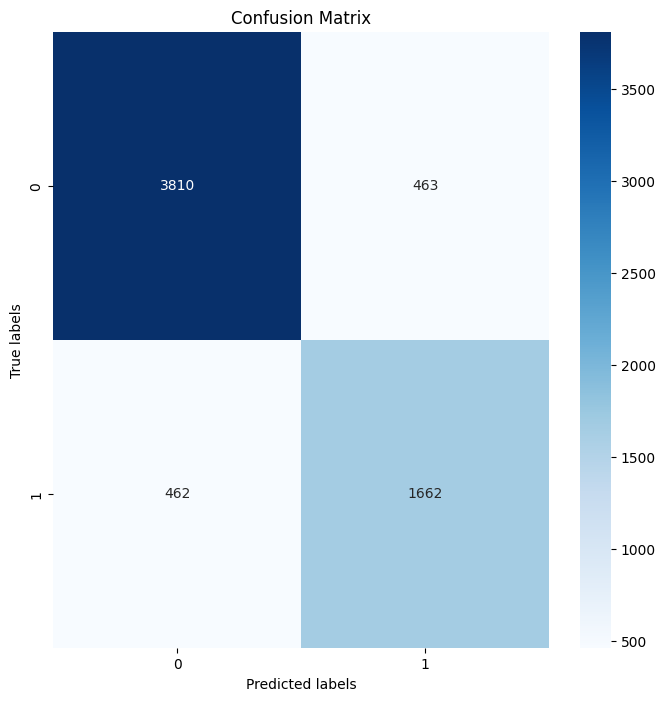

              precision    recall  f1-score   support

           0       0.89      0.89      0.89      4273
           1       0.78      0.78      0.78      2124

    accuracy                           0.86      6397
   macro avg       0.84      0.84      0.84      6397
weighted avg       0.86      0.86      0.86      6397



In [13]:
for scaler in scalers:
    # Scale the training and test sets
    X_train_scaled = scalers[scaler].fit_transform(X_train)
    X_test_scaled = scalers[scaler].transform(X_test)

    from sklearn.neural_network import MLPClassifier

    # Make model
    model_mlp = MLPClassifier(hidden_layer_sizes=(100, 100, 100), activation='relu', solver='adam', 
                        alpha=0.0001, batch_size='auto', learning_rate='constant', 
                        learning_rate_init=0.001, power_t=0.5, max_iter=1000, shuffle=True, 
                        random_state=42, tol=0.0001, verbose=False, warm_start=False, 
                        momentum=0.9, nesterovs_momentum=True, early_stopping=False, 
                        validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08, 
                        n_iter_no_change=10, max_fun=15000)

    # Train model
    model_mlp.fit(X_train_scaled, y_train)

    # Use predict method on test data
    y_pred_mlp = model_mlp.predict(X_test_scaled)

    # Compute the accuracy score
    accuracy = accuracy_score(y_test, y_pred_mlp)
    print(f'Accuracy: {accuracy:.2f}')

    # Compute the precision score
    precision = precision_score(y_test, y_pred_mlp, average='weighted')
    print(f'Precision: {precision:.2f}')

    # Compute the recall score
    recall = recall_score(y_test, y_pred_mlp, average='weighted')
    print(f'Recall: {recall:.2f}')

    # Compute the F1 score
    f1 = f1_score(y_test, y_pred_mlp, average='weighted')
    print(f'F1 Score: {f1:.2f}')

    # Compute the balanced accuracy score
    balanced_accuracy = balanced_accuracy_score(y_test, y_pred_mlp)
    print(f'Balanced Accuracy: {balanced_accuracy:.2f}')

    # Compute the ROC AUC score
    roc_auc = roc_auc_score(y_test, y_pred_mlp, average='weighted', multi_class='ovr')
    print(f'ROC AUC: {roc_auc:.2f}')

    # Compute the ROC curve
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    n_classes = 2
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test, y_pred_mlp)
        roc_auc[i] = roc_auc_score(y_test, y_pred_mlp)
        
    # Plot the ROC curve
    fig, ax = plt.subplots(figsize=(8, 8))
    for i in range(n_classes):
        ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])

    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver Operating Characteristic (ROC) Curve')
    ax.legend(loc='lower right')
    plt.savefig(f'../reports/images/roc_curve_mlp_scaled_{scaler}.png')
    plt.show()

    # Compute the confusion matrix
    cm = confusion_matrix(y_test, y_pred_mlp)

    # Plot the confusion matrix
    fig, ax = plt.subplots(figsize=(8, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix')
    plt.savefig(f'../reports/images/confusion_matrix_mlp_scaled_{scaler}.png')
    plt.show()

    # Compute the classification report
    cr = classification_report(y_test, y_pred_mlp)
    print(cr)

## XGBoost

Accuracy: 0.85
Precision: 0.85
Recall: 0.85
F1 Score: 0.84
Balanced Accuracy: 0.81
ROC AUC: 0.81


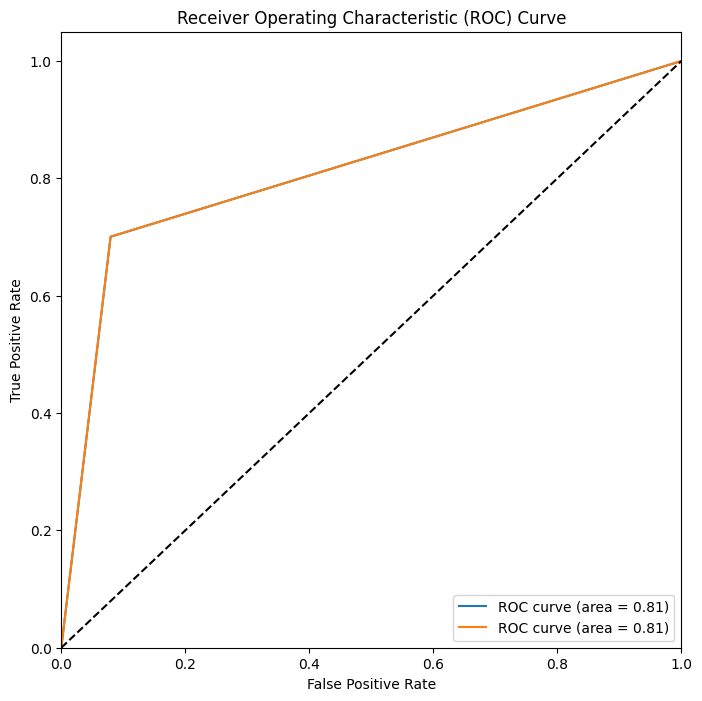

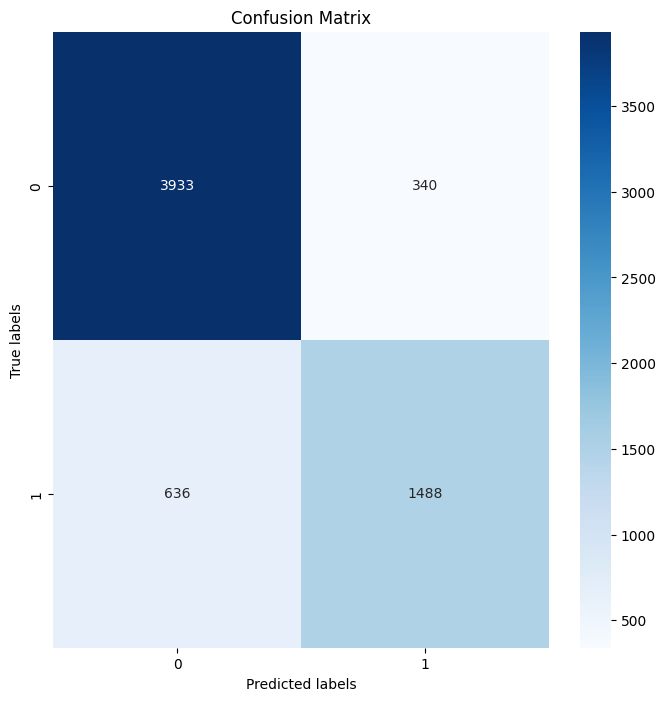

              precision    recall  f1-score   support

           0       0.86      0.92      0.89      4273
           1       0.81      0.70      0.75      2124

    accuracy                           0.85      6397
   macro avg       0.84      0.81      0.82      6397
weighted avg       0.85      0.85      0.84      6397

Accuracy: 0.85
Precision: 0.85
Recall: 0.85
F1 Score: 0.84
Balanced Accuracy: 0.81
ROC AUC: 0.81


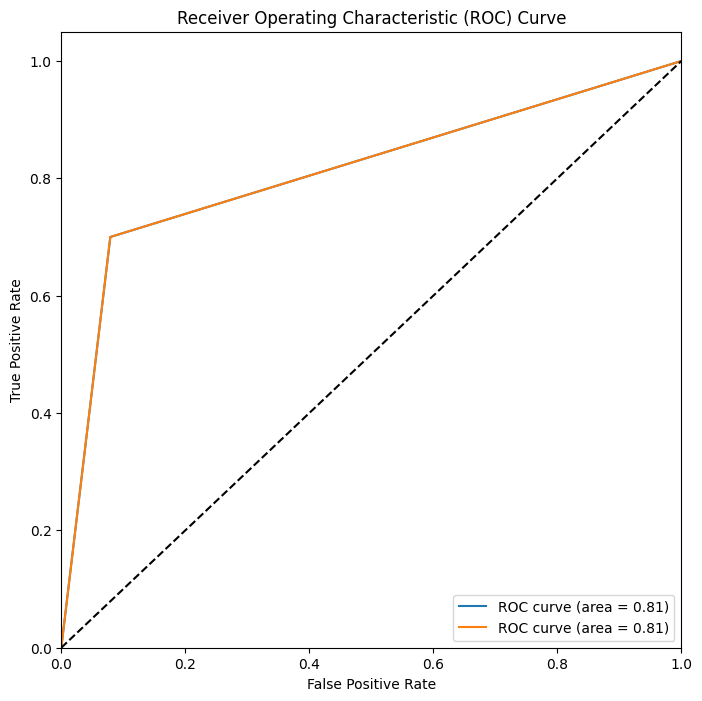

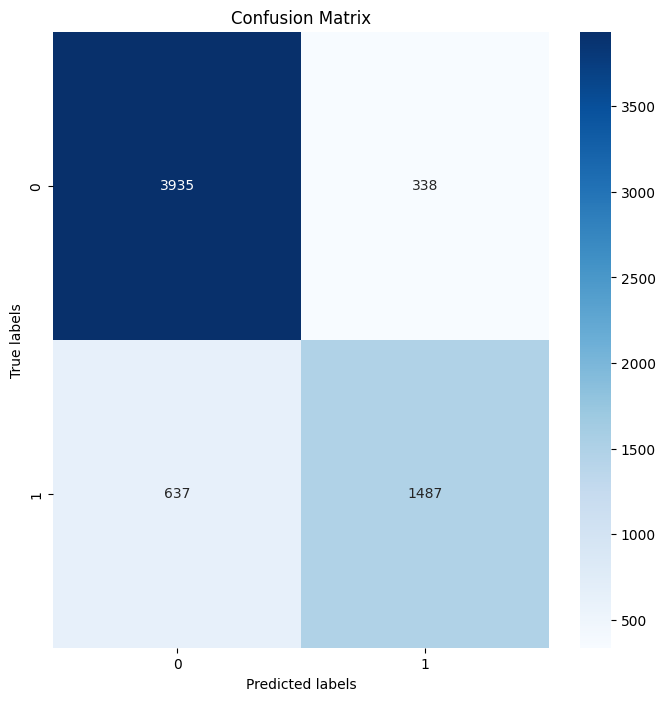

              precision    recall  f1-score   support

           0       0.86      0.92      0.89      4273
           1       0.81      0.70      0.75      2124

    accuracy                           0.85      6397
   macro avg       0.84      0.81      0.82      6397
weighted avg       0.85      0.85      0.84      6397

Accuracy: 0.85
Precision: 0.85
Recall: 0.85
F1 Score: 0.84
Balanced Accuracy: 0.81
ROC AUC: 0.81


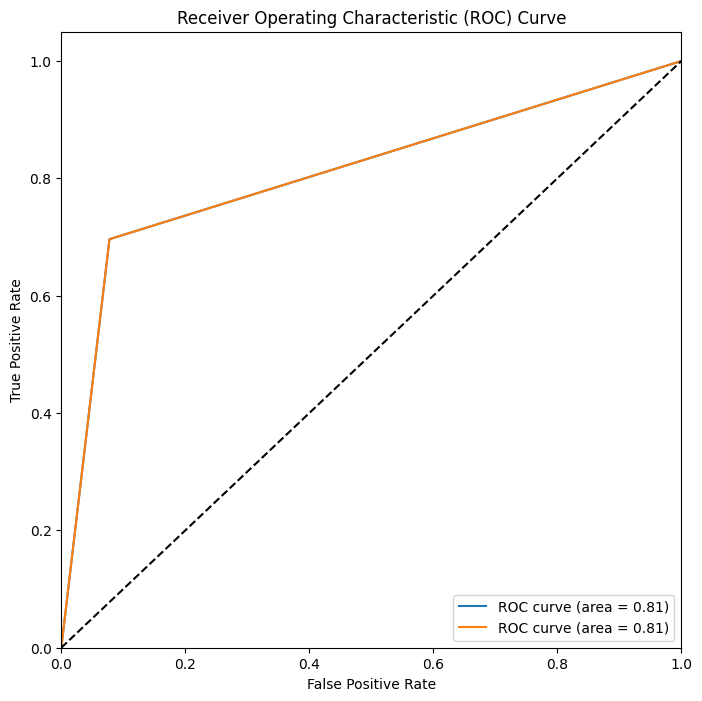

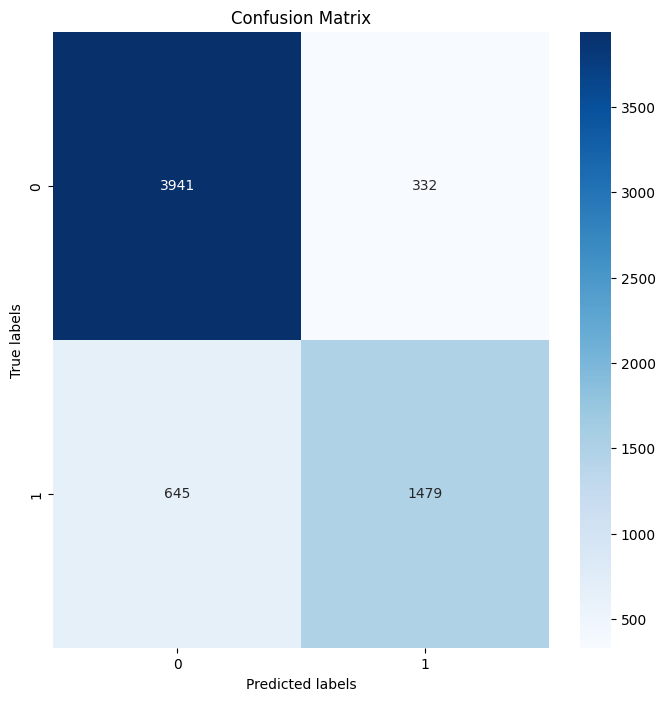

              precision    recall  f1-score   support

           0       0.86      0.92      0.89      4273
           1       0.82      0.70      0.75      2124

    accuracy                           0.85      6397
   macro avg       0.84      0.81      0.82      6397
weighted avg       0.85      0.85      0.84      6397

Accuracy: 0.85
Precision: 0.84
Recall: 0.85
F1 Score: 0.84
Balanced Accuracy: 0.81
ROC AUC: 0.81


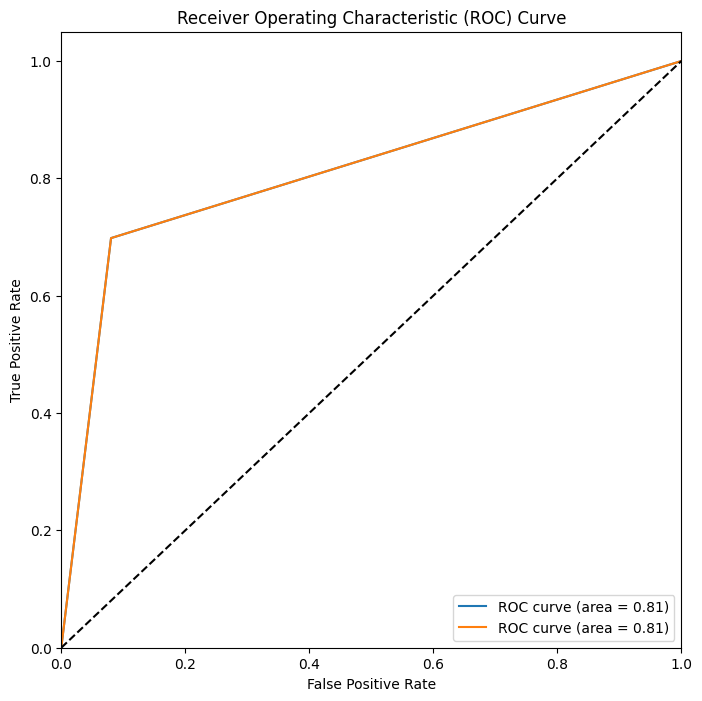

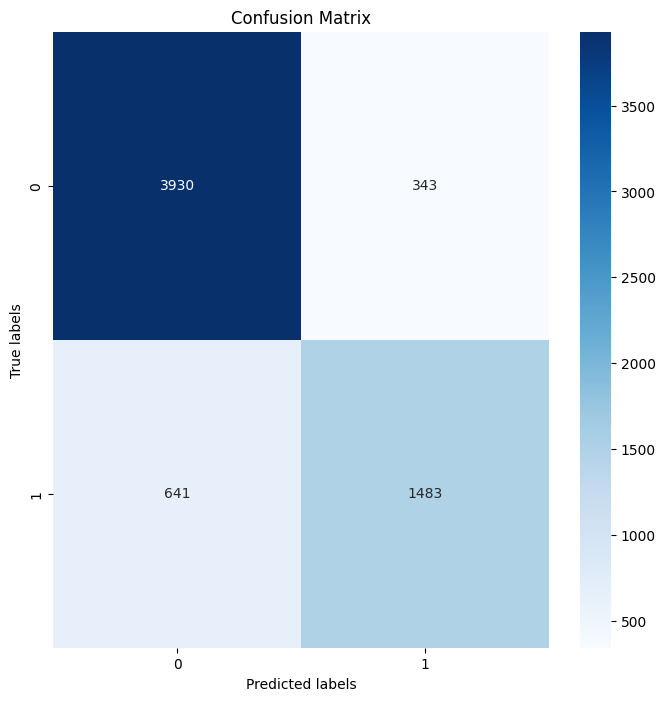

              precision    recall  f1-score   support

           0       0.86      0.92      0.89      4273
           1       0.81      0.70      0.75      2124

    accuracy                           0.85      6397
   macro avg       0.84      0.81      0.82      6397
weighted avg       0.84      0.85      0.84      6397



In [14]:
from xgboost import XGBClassifier

for scaler in scalers:
    # Scale the training and test sets
    X_train_scaled = scalers[scaler].fit_transform(X_train)
    X_test_scaled = scalers[scaler].transform(X_test)
    
    model_xgb = XGBClassifier(
        max_depth=3,
        learning_rate=0.1,
        n_estimators=100,
        verbosity=1,
        objective='binary:logistic',
        booster='gbtree',
        tree_method='auto',
        n_jobs=1,
        gpu_id=-1,
        gamma=0,
        min_child_weight=1,
        max_delta_step=0,
        subsample=1,
        colsample_bytree=1,
        colsample_bylevel=1,
        colsample_bynode=1,
        reg_alpha=0,
        reg_lambda=1,
        scale_pos_weight=1,
        base_score=0.5,
        random_state=42,
        missing=0, 
        num_parallel_tree=1,
        importance_type='gain',
    )

    # Train model
    model_xgb.fit(X_train_scaled, y_train)

    # Use predict method on test data
    y_pred_xgb = model_xgb.predict(X_test_scaled)

    # Compute the accuracy score
    accuracy = accuracy_score(y_test, y_pred_xgb)
    print(f'Accuracy: {accuracy:.2f}')

    # Compute the precision score
    precision = precision_score(y_test, y_pred_xgb, average='weighted')
    print(f'Precision: {precision:.2f}')

    # Compute the recall score
    recall = recall_score(y_test, y_pred_xgb, average='weighted')
    print(f'Recall: {recall:.2f}')

    # Compute the F1 score
    f1 = f1_score(y_test, y_pred_xgb, average='weighted')
    print(f'F1 Score: {f1:.2f}')

    # Compute the balanced accuracy score
    balanced_accuracy = balanced_accuracy_score(y_test, y_pred_xgb)
    print(f'Balanced Accuracy: {balanced_accuracy:.2f}')

    # Compute the ROC AUC score
    roc_auc = roc_auc_score(y_test, y_pred_xgb, average='weighted', multi_class='ovr')
    print(f'ROC AUC: {roc_auc:.2f}')

    # Compute the ROC curve
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    n_classes = 2
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test, y_pred_xgb)
        roc_auc[i] = roc_auc_score(y_test, y_pred_xgb)
        
    # Plot the ROC curve
    fig, ax = plt.subplots(figsize=(8, 8))
    for i in range(n_classes):
        ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])

    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver Operating Characteristic (ROC) Curve')
    ax.legend(loc='lower right')
    plt.savefig(f'../reports/images/roc_curve_xgb_scaled_{scaler}.png')
    plt.show()

    # Compute the confusion matrix
    cm = confusion_matrix(y_test, y_pred_xgb)

    # Plot the confusion matrix
    fig, ax = plt.subplots(figsize=(8, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix')
    plt.savefig(f'../reports/images/confusion_matrix_xgb_scaled_{scaler}.png')
    plt.show()

    # Compute the classification report
    cr = classification_report(y_test, y_pred_xgb)
    print(cr)

## LogisticRegression

Accuracy: 0.80
Precision: 0.80
Recall: 0.80
F1 Score: 0.80
Balanced Accuracy: 0.76
ROC AUC: 0.76


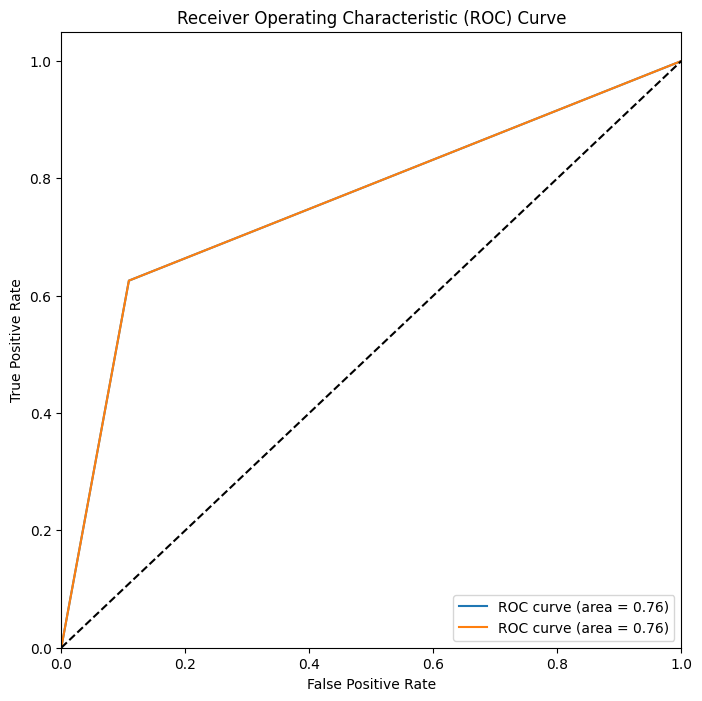

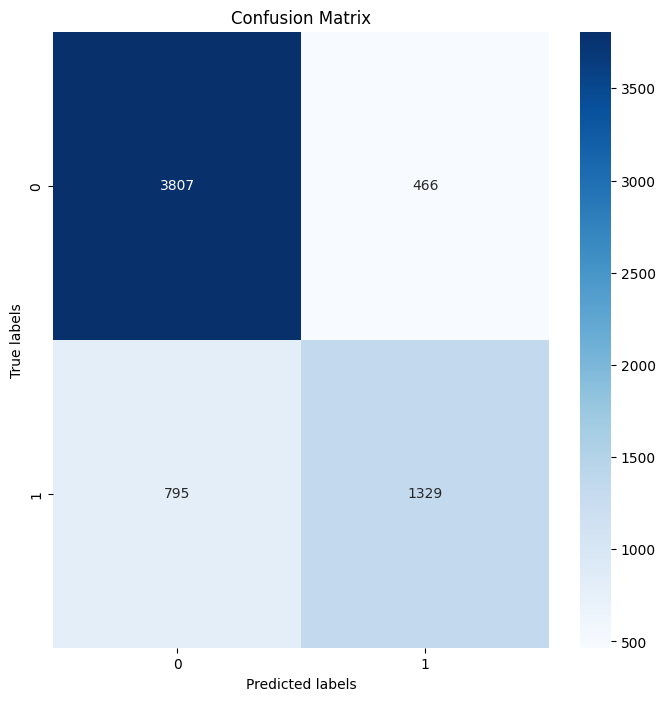

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      4273
           1       0.74      0.63      0.68      2124

    accuracy                           0.80      6397
   macro avg       0.78      0.76      0.77      6397
weighted avg       0.80      0.80      0.80      6397

Accuracy: 0.80
Precision: 0.80
Recall: 0.80
F1 Score: 0.80
Balanced Accuracy: 0.76
ROC AUC: 0.76


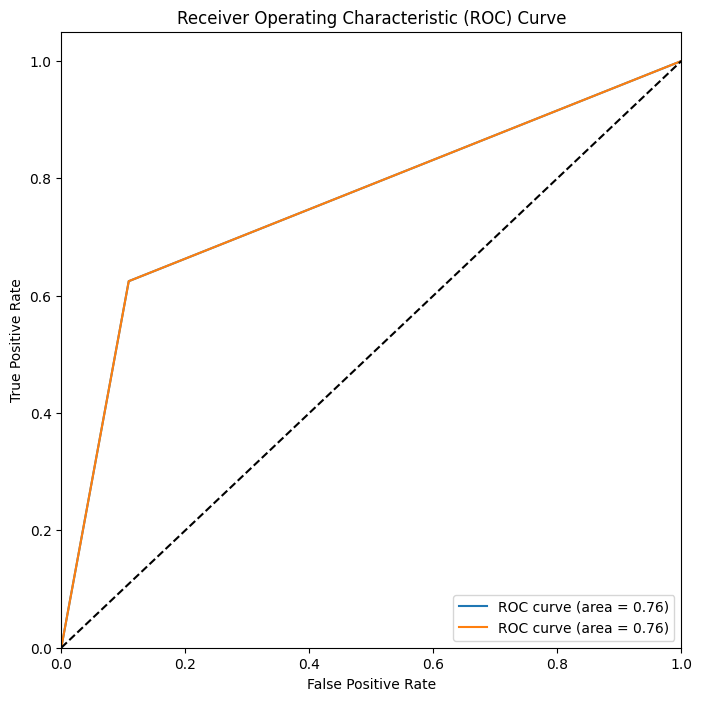

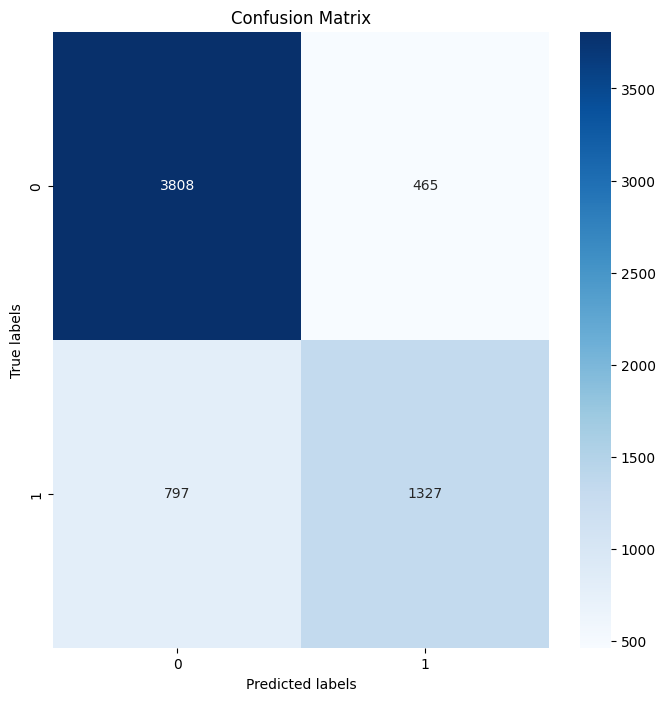

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      4273
           1       0.74      0.62      0.68      2124

    accuracy                           0.80      6397
   macro avg       0.78      0.76      0.77      6397
weighted avg       0.80      0.80      0.80      6397

Accuracy: 0.80
Precision: 0.80
Recall: 0.80
F1 Score: 0.79
Balanced Accuracy: 0.75
ROC AUC: 0.75


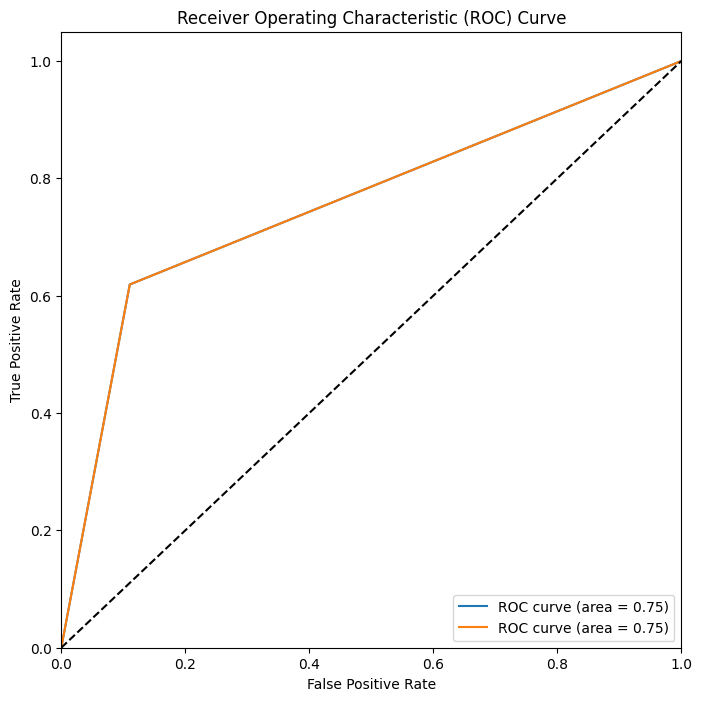

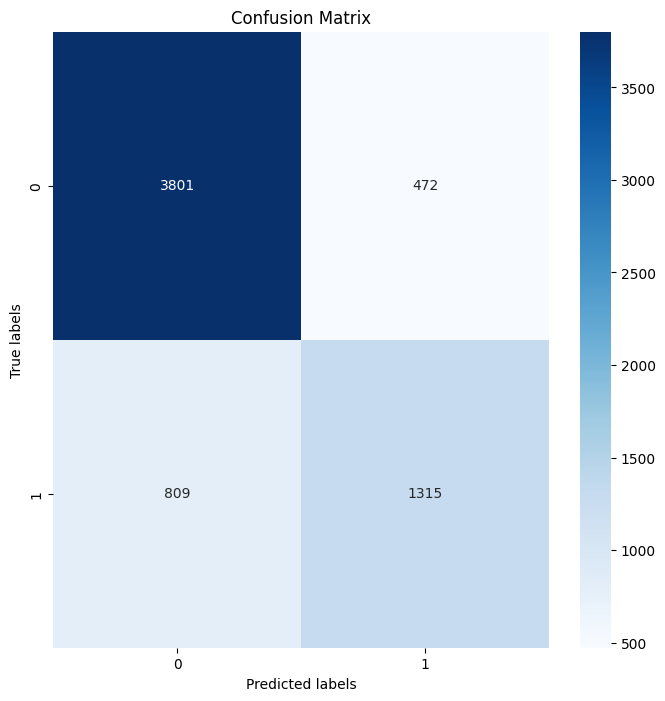

              precision    recall  f1-score   support

           0       0.82      0.89      0.86      4273
           1       0.74      0.62      0.67      2124

    accuracy                           0.80      6397
   macro avg       0.78      0.75      0.76      6397
weighted avg       0.80      0.80      0.79      6397

Accuracy: 0.80
Precision: 0.80
Recall: 0.80
F1 Score: 0.80
Balanced Accuracy: 0.76
ROC AUC: 0.76


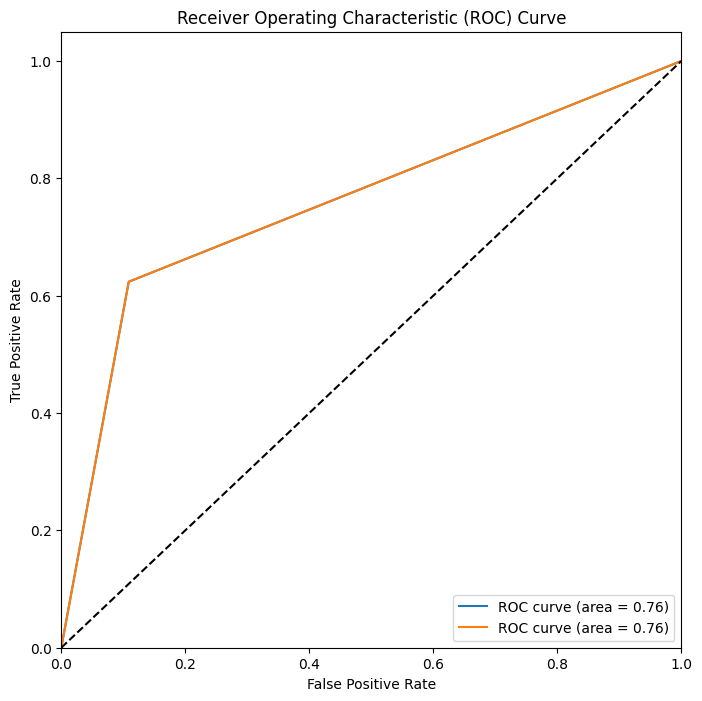

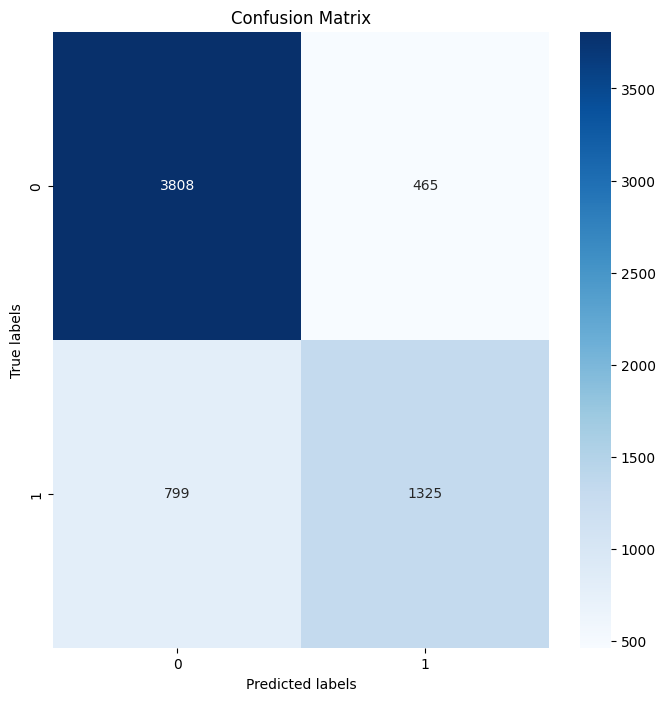

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      4273
           1       0.74      0.62      0.68      2124

    accuracy                           0.80      6397
   macro avg       0.78      0.76      0.77      6397
weighted avg       0.80      0.80      0.80      6397



In [15]:
for scaler in scalers:
    # Scale the training and test sets
    X_train_scaled = scalers[scaler].fit_transform(X_train)
    X_test_scaled = scalers[scaler].transform(X_test)

    from sklearn.linear_model import LogisticRegression

    model_lr = LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=1.0, fit_intercept=True,
                                intercept_scaling=1, class_weight=None, random_state=42, solver='lbfgs',
                                max_iter=1000, multi_class='auto', verbose=0, warm_start=False, n_jobs=None,
                                l1_ratio=None)

    # Train model
    model_lr.fit(X_train_scaled, y_train)

    # Use predict method on test data
    y_pred_lr = model_lr.predict(X_test_scaled)

    # %%
    # Compute the accuracy score
    accuracy = accuracy_score(y_test, y_pred_lr)
    print(f'Accuracy: {accuracy:.2f}')

    # Compute the precision score
    precision = precision_score(y_test, y_pred_lr, average='weighted')
    print(f'Precision: {precision:.2f}')

    # Compute the recall score
    recall = recall_score(y_test, y_pred_lr, average='weighted')
    print(f'Recall: {recall:.2f}')

    # Compute the F1 score
    f1 = f1_score(y_test, y_pred_lr, average='weighted')
    print(f'F1 Score: {f1:.2f}')

    # Compute the balanced accuracy score
    balanced_accuracy = balanced_accuracy_score(y_test, y_pred_lr)
    print(f'Balanced Accuracy: {balanced_accuracy:.2f}')

    # Compute the ROC AUC score
    roc_auc = roc_auc_score(y_test, y_pred_lr, average='weighted', multi_class='ovr')
    print(f'ROC AUC: {roc_auc:.2f}')

    # Compute the ROC curve
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    n_classes = 2
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test, y_pred_lr)
        roc_auc[i] = roc_auc_score(y_test, y_pred_lr)
        
    # Plot the ROC curve
    fig, ax = plt.subplots(figsize=(8, 8))
    for i in range(n_classes):
        ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])

    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver Operating Characteristic (ROC) Curve')
    ax.legend(loc='lower right')
    plt.savefig(f'../reports/images/roc_curve_lr_scaled_{scaler}.png')
    plt.show()

    # Compute the confusion matrix
    cm = confusion_matrix(y_test, y_pred_lr)

    # Plot the confusion matrix
    fig, ax = plt.subplots(figsize=(8, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix')
    plt.savefig(f'../reports/images/confusion_matrix_lr_scaled_{scaler}.png')
    plt.show()

    # Compute the classification report
    cr = classification_report(y_test, y_pred_lr)
    print(cr)